# IFN619 Assignment2(Insight report)_stream B
## ChakHo_CHAN n10954856

# Question: What can we learn from Airline satisfaction by US passenger?

Summary: Airline industry is very competitive. The first impression of people always focuses on the airline service and capabilities. Also, passengers are representing different stakeholders and it means airlines must response to their needs that can affect their satisfaction. Since the higher the passenger satisfaction the better airline operation and turnover. This analysis will attract airline business managers and airline passengers' interest. Passengers data will be used to predict the whether they are satisfy or not, there are 129880 rows and 23 columns of features. Neural network and decision tree model will be applied for this classification dataset.  
It will find and discuss common features that would impact the passengers' satisfaction.  
Then what travel issues that affect passenger satisfaction can be reflected in this dataset?  
What recommendations can be provided to airline's stakeholders(travel issue , male and female passenger satisfaction improvement)?  
And lastly, the pros and cons of the models will be mentioned in the conclusion.  

Risks and limitations of dataset and insight:
- The passenger backgrounds are US based, it might not fit to all airline's style or other countries of passengers.
- The airline generated this dataset only for understanding the passengers' satisfaction to the business function, however, there are lot of aspects to be considered which can make airline more functionable, reliable, sustainable to satisfy more customers.

**There are feature descriptions of the dataset:**  
**passenger data:**  
0 - id (numeric)  
2 - Gender: Gender of the passengers (categoical: Female, Male)  
3 - Customer Type:The customer type (categoical: Loyal customer, disloyal customer)  
4 - Age:The actual age of the passengers (numeric)  
5 - Type of Travel:Purpose of the flight of the passengers (categorical: Personal Travel, Business Travel)  
6 - Class:Travel class in the plane of the passengers (categorical: Business, Eco, Eco Plus)  
7 - Flight distance:The flight distance of this journey(numeric)  

**Satisfaction of airlines' service:**  
8 - Seat comfort:Satisfaction level of Seat comfort (0:Not Applicable;1-5)  
8 - Departure/Arrival time convenient:Satisfaction level of Departure/Arrival time convenient (0:Not Applicable;1-5)  
10 - Food and drink:Satisfaction level of Food and drink (0:Not Applicable;1-5)  
11 - Gate location:Satisfaction level of Gate location (0:Not Applicable;1-5)  
12 - Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)  
13 - Inflight entertainment:Satisfaction level of inflight entertainment (0:Not Applicable;1-5)  
14 - Online support (0:Not Applicable;1-5)  
15 - Ease of Online booking: Satisfaction level of online booking (0:Not Applicable;1-5)  
16 - On-board service: Satisfaction level of On-board service (0:Not Applicable;1-5)  
17 - Leg room service: Satisfaction level of Leg room service (0:Not Applicable;1-5)  
18 - Baggage handling:Satisfaction level of baggage handling (0:Not Applicable;1-5)       
19 - Check-in service: Satisfaction level of Check-in service (0:Not Applicable;1-5)  
20 - Cleanliness:Satisfaction level of Cleanliness (0:Not Applicable;1-5)  
21 - Online boarding:Satisfaction level of online boarding (0:Not Applicable;1-5)  

 **Other attributes:**  

22 - Departure Delay in Minutes:Minutes delayed when departure (numeric)  
23 - Arrival Delay in Minutes:Minutes delayed when Arrival (numeric)  

**Output variable(target):**  
1- satisfaction_v2 (Satisfaction, dissatisfaction)

I believe this data analysis can be high relevant to airline and travel studies, travel business management, government policy making etc. Also, after COVID19 era, air travelling will be increase and knowing what cause passengers satisfaction will enhance the reputation and revenue.

## EDA analysis

In [1]:
# These are the packages we can use later.

# update for tensorflow
from __future__ import absolute_import, division, print_function, unicode_literals
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot

# mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPool2D,  Conv3D, MaxPool3D,Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import RandomUniform

# keras / deep learning libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras import regularizers
from keras import regularizers
from keras.regularizers import l2

# callbacks
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Figure Plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import seaborn as sns
sns.set()

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import statistics as stat
import seaborn as sns
import random as rn
import re
import warnings
from warnings import filterwarnings
import csv

# feature transformation
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler,LabelEncoder

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras import metrics
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.initializers import glorot_uniform

import lime
from lime import lime_tabular

In [2]:
#read data and replace the nan value
df = pd.read_csv('dataset/satisfaction.csv',na_filter = False)
#Check the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id                                 129880 non-null  int64 
 1   satisfaction_v2                    129880 non-null  object
 2   Gender                             129880 non-null  object
 3   Customer Type                      129880 non-null  object
 4   Age                                129880 non-null  int64 
 5   Type of Travel                     129880 non-null  object
 6   Class                              129880 non-null  object
 7   Flight Distance                    129880 non-null  int64 
 8   Seat comfort                       129880 non-null  int64 
 9   Departure/Arrival time convenient  129880 non-null  int64 
 10  Food and drink                     129880 non-null  int64 
 11  Gate location                      129880 non-null  

In [3]:
# From data info we know that there are space name problem, have to remove space before more preprocessing.
df.rename(columns = {'id': 'id', 'satisfaction_v2': 'satisfaction', "Gender":"Gender", "Customer Type":"Customer_Type",
                          "Age":"Age", "Type of Travel":"Type_of_Travel", "Class":"Class", "Flight Distance":"Flight_Distance",
                           "Seat comfort":"Seat_comfort", "Departure/Arrival time convenien":"Departure/Arrival_time_convenien", "Food and drink":"Food_and_drink", "Gate location":"Gate_location",
                          "Inflight wifi service":"Inflight_wifi_service", "Inflight entertainment":"Inflight_entertainment","Online support":"Online_support","Ease of Online booking":"Ease_of_Online_booking",
                     "On-board service":"On-board_service", "Leg room service":"Leg_room_service","Baggage handling":"Baggage_handling","Checkin service":"Checkin_service","Cleanliness":"Cleanliness",
                     "Online boarding":"Online_boarding","Departure Delay in Minutes":"Departure_Delay_in_Minutes", "Arrival Delay in Minutes":"Arrival_Delay_in_Minutes"}, inplace = True)
#df.columns = [c.replace(' ', '_') for c in df.columns]
#df = df.set_index('satisfaction')
#df = df.rename(index={'neutral or dissatisfied':'dissatisfied'})

In [4]:
# Checking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
id,0,0.0
satisfaction,0,0.0
Departure_Delay_in_Minutes,0,0.0
Online_boarding,0,0.0
Cleanliness,0,0.0


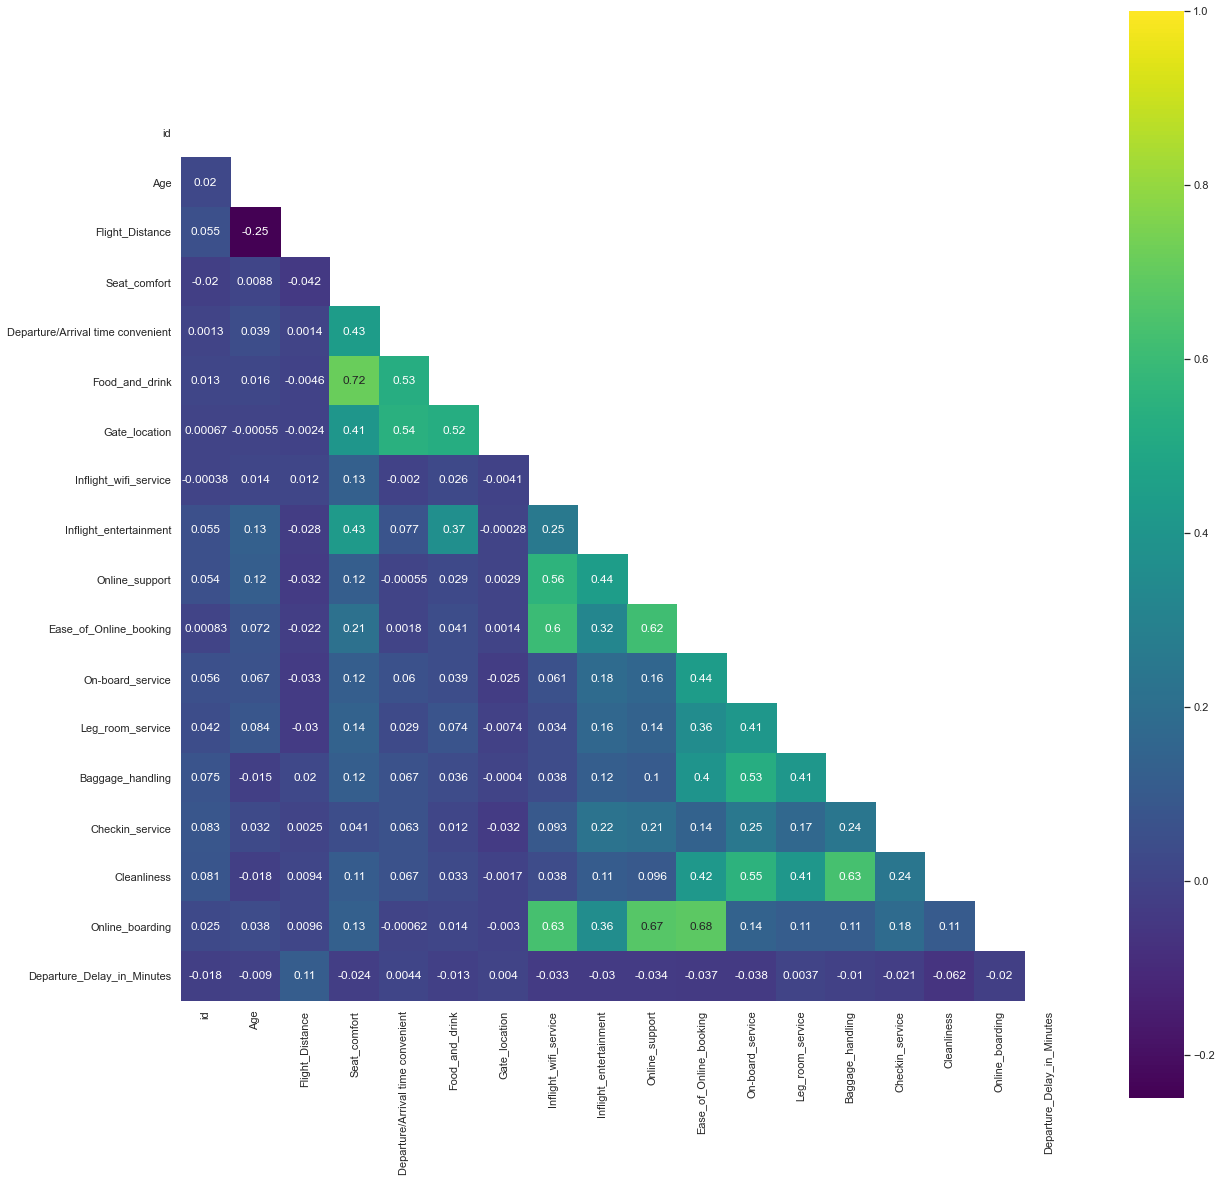

In [5]:
# correlation matrix to see if there are any unnecessary features that can be taken out.
correlation_matrix = df.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(correlation_matrix, mask=mask, vmax=1.0, square=True, cmap="viridis", annot=True)

In [6]:
#I drop "id","Arrival_Delay_in_Minutes","Ease_of_Online_booking","Online_boarding" because according to correlation map,the values are almost the same
df.drop(["id", "Arrival_Delay_in_Minutes", "Ease_of_Online_booking", "Online_support"],inplace= True,  axis=1)

# Map ordinal categorical column to 0 and 1.
satisfaction_map = {"neutral or dissatisfied":0, "satisfied":1}
df["satisfaction"] = df["satisfaction"].map(satisfaction_map)

# One hot encoding non ordinal categorical data.
df = pd.get_dummies(df, columns = ['Gender', 'Customer_Type', 'Type_of_Travel','Class'])

# Split target variable, we want to predict satisfcation.
class_var ="satisfaction"
X_df = df.drop(class_var, axis=1) 
y_df = df[class_var]
y_df.value_counts() #total 129880 samples, but have data a slightly imbalanced problem. (1)55%:(0)45%, 5% difference do not matter.

1    71087
0    58793
Name: satisfaction, dtype: int64

In [32]:
#Age = pd.pivot_table(df, index='Age', columns='satisfaction', aggfunc='count', fill_value=0)
#Age = pd.pivot_table(df, index='satisfaction', columns='Age', aggfunc='count', fill_value=0)
#pd.set_option("max_columns", None)

In [7]:
# normalize features
enc = OneHotEncoder()
Y_df = enc.fit_transform(y_df[:, np.newaxis]).toarray()

In [8]:
# normalise your data vales in X. Use the MinMax Scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_df)
X_scaled

array([[0.74358974, 0.03115491, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.51282051, 0.34980438, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.1025641 , 0.30256485, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.79487179, 0.32893784, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.75641026, 0.34777568, 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.3974359 , 0.61686712, 0.6       , ..., 0.        , 1.        ,
        0.        ]])

In [9]:
X_df.shape

(129880, 24)

In [10]:
from keras import regularizers
# Split to train, validation, test data.  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_df, test_size=0.3, random_state = 515)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state = 515)

# We set early stopping if model doesn't has improvement after 30 iterations.
early_stop = EarlyStopping(monitor='val_loss', patience=50, verbose=1, mode='min')
callbacks_list = [early_stop]

# define the Machine Learning Model: Neural Network
model = Sequential()

# This is the best hyperparameters I can get so far, we have 24 columns after data pre-processing. 
# Here we use weight regularization and dropout to prevent overfitting.
model.add(Dense(15, input_dim=24, activation='tanh'))#input layer
model.add(Dense(10, activation='tanh'))#hidden layer
model.add(Dense(5, activation='tanh'))#hidden layer
model.add(Dense(2, activation='sigmoid'))#output layer # Input layer are two dimensions because we are doing binary classification.

# Compile the network using binary_crossentropy since we are doing a binary classification problem. 
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.summary()

# Fit model, we set 150 times iteration limits here.
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, verbose=1,  callbacks = callbacks_list)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                375       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total params: 602
Trainable params: 602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
2842/2842 [==============================] - 3s 821us/step - loss: 0.3505 - accuracy: 0.8539 - val_loss: 0.2977 - val_accuracy: 0.8788
Epoch 2/150
2842/2842 [==============================] - 2s 763us/step - loss: 0.2493 - accuracy: 0.8980 - va

In [11]:
# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=1)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('Train: %.3f, Test: %.3f' % (train_loss, test_loss))

609/609 [==============================] - 0s 510us/step - loss: 0.1261 - accuracy: 0.9432
Train: 0.947, Test: 0.943
Train: 0.117, Test: 0.126


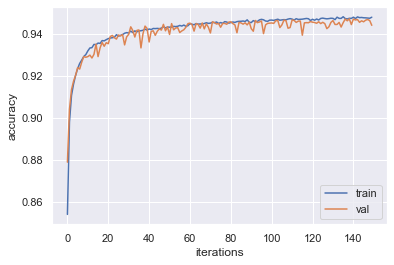

In [12]:
# Plot training history, the accuracy learning curve do not show overfitting or underfitting problem.
metric = "accuracy"
pyplot.plot(history.history[metric], label='train')
pyplot.plot(history.history["val_" + metric], label='val')
pyplot.ylabel('accuracy', fontsize=12)
pyplot.xlabel('iterations', fontsize=12)
pyplot.legend()
pyplot.show()

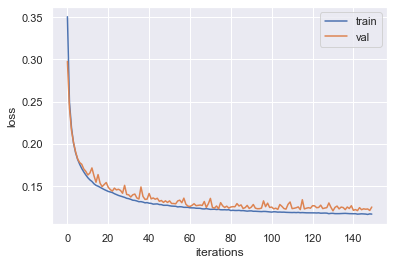

In [13]:
# Plot loss history, the loss learning curve is good.
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.ylabel('loss', fontsize=12)
pyplot.xlabel('iterations', fontsize=12)
pyplot.legend()
pyplot.show()

In [14]:
#saving the model
!mkdir -p model
model.save('model/my_model')

INFO:tensorflow:Assets written to: model/my_model/assets


In [15]:
model.save('nn.h5')

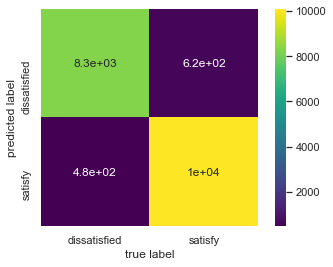

In [16]:
# Make a confusion matrix to evaluate the prdiction result, not too bad.
from sklearn.metrics import confusion_matrix
from matplotlib import cm

groundtruth = enc.inverse_transform( y_test )
predictions = enc.inverse_transform( model.predict( X_test ) )
classes=['dissatisfied', 'satisfy']
mat = confusion_matrix(groundtruth, predictions)
sns.heatmap(mat.T, square=True, cbar=True,
          annot=True, cmap=cm.viridis, xticklabels=classes,yticklabels=classes)

plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
# Compare model prediction and true answer to see the correctness of each sample, make sure we have 4 kinds of predictions like confusion matrix.
for satisfy_indx in range(1,100):

    satisfy_feat = X_scaled[satisfy_indx,:]
    satisfy_true_pred = enc.inverse_transform(np.expand_dims(Y_df[satisfy_indx,:], 0))[0][0]

    # prediction
    pred = model.predict(np.expand_dims(satisfy_feat, 0))
    pred = enc.inverse_transform( pred )[0][0]

    print("passenger id: %d \t Predicted: %s \t True prediction: %s\n" 
      %(satisfy_indx,"satisfied" if pred else "dissatisfied", "satisfied" if satisfy_true_pred else "dissatisfied"))

passenger id: 1 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 2 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 3 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 4 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 5 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 6 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 7 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 8 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 9 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 10 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 11 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 12 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 13 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 14 	 Predicted: satisfied 	 True prediction: satisfied

passenger id: 15 	 Predicted:

In [18]:
feature_names = df.columns.to_list()
feature_names.remove("satisfaction")

In [19]:
# LIME has one explainer for all the models
explainer = lime_tabular.LimeTabularExplainer(X_train, feature_names= feature_names,
                                                  class_names=["dissatisfied", "satisfied"], verbose=False, mode='classification')

# True Positive

In [20]:
MAX_FEAT = 24

In [21]:
import random
# We take a look at some false negative samples to understand what kind of features they have in common.
# We only look at those samples with prediction probabilities over 0.80 in order to get pure result.
satisfy_indx= 70000

satisfy_feat = X_scaled[satisfy_indx,:]
satisfy_true_pred = enc.inverse_transform(np.expand_dims(Y_df[satisfy_indx,:], 0))[0][0]

# prediction
pred = model.predict(np.expand_dims(satisfy_feat, 0))
pred = enc.inverse_transform( pred )[0][0]

print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
      %(satisfy_indx, "satisfied" if pred else "dissatisfied", "satisfied" if satisfy_true_pred else "dissatisfied"))

Patient id: 70000 	 Predicted: dissatisfied 	 True Diagnosis: dissatisfied



In [22]:
# explain instance
exp = explainer.explain_instance(satisfy_feat, model.predict, num_features= MAX_FEAT )
exp

In [23]:
# Show the predictions
#Below figure shows us the actual predicted value, a bar chart showing weights of how features contributed to 
#this prediction, and a table showing actual feature values.

exp.show_in_notebook(show_table=True)

In [24]:
exp.as_list()

[('Customer_Type_disloyal Customer <= 0.00', 0.3415216700197525),
 ('0.00 < Gender_Male <= 1.00', -0.2123532002019881),
 ('Seat_comfort <= 0.40', -0.20854991465560413),
 ('Type_of_Travel_Personal Travel <= 0.00', 0.1362763486810805),
 ('Gender_Female <= 0.00', 0.13259283651195977),
 ('0.00 < Class_Business <= 1.00', -0.12688201227151535),
 ('Inflight_entertainment <= 0.40', -0.09450273575943922),
 ('Class_Eco Plus <= 0.00', 0.07676212440035321),
 ('0.00 < Type_of_Travel_Business travel <= 1.00', -0.06946128012303746),
 ('Departure/Arrival time convenient <= 0.40', 0.06552991997271435),
 ('Baggage_handling <= 0.50', -0.06030323402359237),
 ('Class_Eco <= 0.00', 0.050804630291606964),
 ('0.80 < Leg_room_service <= 1.00', 0.039568121425903935),
 ('0.60 < Checkin_service <= 0.80', 0.03628929980132518),
 ('Online_boarding <= 0.40', -0.026034032355115068),
 ('Food_and_drink <= 0.40', 0.022892807079143894),
 ('Departure_Delay_in_Minutes <= 0.00', 0.022581378043659322),
 ('Cleanliness <= 0.60'

# True Negative

In [25]:
import random
# We take a look at some false negative samples to understand what kind of features they have in common.
# We only look at those samples with prediction probabilities over 0.80 in order to get pure result.
satisfy_indx= 998


satisfy_feat = X_scaled[satisfy_indx,:]
satisfy_true_pred = enc.inverse_transform(np.expand_dims(Y_df[satisfy_indx,:], 0))[0][0]

# prediction
pred = model.predict(np.expand_dims(satisfy_feat, 0))
pred = enc.inverse_transform( pred )[0][0]

print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
      %(satisfy_indx, "satisfied" if pred else "neutral or dissatisfied", "satisfied" if satisfy_true_pred else "neutral or dissatisfied"))

Patient id: 998 	 Predicted: satisfied 	 True Diagnosis: satisfied



In [26]:
exp = explainer.explain_instance(satisfy_feat, model.predict, num_features= MAX_FEAT )
exp

In [27]:
exp.show_in_notebook(show_table=True)

In [28]:
exp.as_list()

[('Customer_Type_disloyal Customer <= 0.00', 0.33515011435095843),
 ('Gender_Male <= 0.00', 0.21977062759635313),
 ('Seat_comfort <= 0.40', -0.19547222240722825),
 ('0.00 < Type_of_Travel_Personal Travel <= 1.00', -0.14795315053238356),
 ('0.00 < Gender_Female <= 1.00', -0.12255240476987249),
 ('Class_Business <= 0.00', 0.12057746364569852),
 ('Type_of_Travel_Business travel <= 0.00', 0.09155953391446964),
 ('Inflight_entertainment <= 0.40', -0.08373474391932834),
 ('Class_Eco <= 0.00', 0.07665989274541189),
 ('Class_Eco Plus > 0.00', -0.07346412295323428),
 ('Online_boarding <= 0.40', -0.06254408784221094),
 ('On-board_service <= 0.60', -0.05063541204477356),
 ('0.60 < Departure/Arrival time convenient <= 0.80', -0.04386820749105222),
 ('Checkin_service > 0.80', 0.03954731119844536),
 ('0.80 < Leg_room_service <= 1.00', 0.031010632307232115),
 ('0.80 < Cleanliness <= 1.00', -0.02442486105744945),
 ('Age <= 0.26', 0.020324011560055855),
 ('Inflight_wifi_service <= 0.40', -0.01483455086

# Insight: What we can tell from the data?

Firstly, I want to combine the interesting findings with some real-life experience and summerise why passengers are satisfied or dissatisfied. Secondly, some social or environmental issues will be discussed which are reflected in this dataset. The features provided in this dataset might be not comprehensive enough but we can understand some stories by the feature distribution.

Method:
LIME is a useful tool to help explaining the prediction of the neural network's model, we can understand what are the majority of weighting factors for passenger satisfaction. 130 samples were summarised with True positive(dissatisfied) and True negative(satisfied) as well as some general data of variables. All the chosen samples are with prediction probabilities over 0.8. Therefore, the result should be accurated.

### What differences do we have between passengers who are dissatisfied or satisfied?

 <img src="visualisation/sample1.PNG" width="500" />^ summarized samples from lime <img src="visualisation/age.PNG" width="1000" /> ^ Age satisfaction distribution (**BOLD are age**) <img src="visualisation/general1.PNG" width="700" /> ^ Total number of satisfaction (class, travel_type, customer_type)

Even though this sample collection is just 130 samples, the distribution and patterns are sufficient enough to tell us some of the stories. First, we look at the gender, more male seems to feel dissatisfied. From general data, passengers younger than 38 years old are tended to feel dissatisfied. Young age to the middle age group of passengers might be knowledgable and travel more frequently. 39 years old or older age group have a better portion of satisfaction. Since there are a lot of accessible service for this group of passengers, or they might have different satisfaction considerations that did not asked in this data collection. 
It is interesting to see that part of some disloyal customers tend to be satisfied with the service. They can be potential loyal customer if they are happy. In my experience, I always pay more attention to the service when I fly with a new airline. This can be the reason why the disloyal customer has a deep impression and might feel satisfied. On the other hand, a small mistake can also turn disloyal customers to be dissatisfied, so they can be very sensitive. But in general data shows only a small portion of the disloyal customers feel satisfied. I will explain the reason of this kind of bias in the coming session.

<img src="visualisation/sample2.PNG" width="500" /> ^ summarized samples from lime  <img src="visualisation/general3.PNG" width="900" />^ Average score from dataset

We can see the pattern of personal travel tends to satisfied and business travel tends to disstisfied. The relationship of travel type and flight class can be seen as business travel fly with business class and most of them are dissatisfied, where personal travel might choose economy or economy plus but they are more satisfied. The first reason could be the overpricing of flight ticket. Secondly, business class passengers might expect the best service, however, many reasons might disappointed them such as delay flight, same baggage handling as economy class, or even onboard facilities didn't meet their needs.

Also noticable that a average 5 minutes departure delay causing passenger from satisfied to dissatisfied, therefore, the departure delay in minutes should be no longer than 12 minutes.

<img src="visualisation/sample3.PNG" width="500" />^ summarized samples from lime <img src="visualisation/general2.PNG" width="1000" />^ Average score by male and female

The samples were spilted into 50% of male and 50% of female focuses, so we can easily find some features distributions. In the male samples, they usually  dissatisfied on seat comfort, inflight entertainment, inflight wifi service and online boarding. It matches the assumption that the passengers are younger than 38, because they may be more familiar with using technology.  In female sample, LIME shows the major satisfied factors which are departure/arrival time convenient, cleanliness, gate location and leg room service. It seems most of the female prefer a clean and tidy environment and convenience which can make them satisfied.

While in the general data, "Seat comfort", "Food and drink", "inflight entertainment" have very low score. Seat comfort dissatisfied scored 2.4 in average. For long-haul flight, it could be a disaster to passengers who have back problem. It is similar situation for food and drink, sometimes passenger required special meal but aricrew might forget to prepare. Culture diversity of food and drink preference can led to a dissatisfaction too. Score of inflight wifi service and inflight entertainment need some improvement, since different passengers have preferences on inflight entertainment,such as music, movie, game, newspaper, internet or using wifi to send message.

### Question: Can this dataset reflects travel issues?

With all the features mentioned, it seems highly related to the satisfaction of passengers. However, I want to highlight something that are not mentioned in this dataset. 

The dataset didn't include environmental issues satisfaction which could also affect passenger satisfaction with flying with the airline. Since some airlines are not entirely transparent to the public. For example, there is no emission target for aviation industry and also the fossil fuel burn cause tons of CO2 and non-CO2 effect that contributed to global warming. In my opinion, using alternative fuels and technology might help reduce CO2 emission. Nevertheless, the airline could have shown more perspectives to the public and passengers that they are social responsibility hence improving the satisfaction. Besides, "Food and drink" has an dissatisfied score 2.4-2.5/5, the passenger might aware of the packaging issue and poor tasting of food, which can also cause environment issue and food wasting. Thus passengers tend to be dissatisfied about with food and drink. 

Some of the passengers might also be concerned about human resource or labour issues, as the travel industry depression causes many airlines laid off senior aircrew and internal staff. Due to the shortage of aircrew, many flights canceled, rescheduled or delayed and it causes aircrews work overtime and benefits being cut. On one side, it might affect the service level provided to passengers, on the other side, there is less manpower to provide online service or telephone service. These issues can be seen in satisfaction of online support and on-broad service, the lowest average score is 2.9 out of 5.

The amount of dissatisfied females has reminded us that there were many sexual assaults on aeroplanes. This kind of issue has seldomly been spoken to the public. Has the airline provided any protection to females or regulations to prevent harassment from happening? This can be a travel issue for the female to affect their satisfaction level. It may not be necesary to bring all the inequality issue for discussion here but with more variables to support or some social issue in the near future that might be one of the satisfaction factor that airlines need to consider.

### What decision tree model and feature importances can interpret?

The drawback of using Lime to check each sample might be not comprehensive enough as there may be some differences from the general data analysis. So I created a decision tree and it can explain clearly. In the decision tree model, optimal hyperparameters was adopted and the prediction accuracy is 98%.

This feature importance can tell us what the decision tree model thinks which feature is important to the result, it represents the whole dataset, while LIME tells us feature importance of each sample in the dataset. These two model's may have found the same pattern from the dataset but the prediction representations are different. From this feature importance it tells us that inflight entertainment, seat comfort, on_board service and age etc. are actually some really important features to the result of satisfaction, this conclusion basicly matches the result we got from neural network plus LIME and general data. 

<img src="visualisation/dt.PNG" width="500" />^ feature importances from Decision Tree <img src="visualisation/ROC.PNG" width="500" /> ^ Decision Tree's ROC

### What are the recommendations for airline in order to satisfy more passengers?

Recommendations for   
- Common issue: improve seat comfort level, such as adjustable seat for kid and elderly passengers.  
- Targetting male passenger: improve inflight entertainment, wifi signal.  
- Targetting female passenger: cleanliness of the seat, table, toilet and increase more convenient facilities to female passenger, for example female toilet instead of unisex toilet.

Other travel concerns:  
- Modern people nowadays tend to live healthy, sustainable and socially responsible. This dataset is created for airlines to understand only certain parts of the business functions, where the airline should also contribute to different social and environmental areas. Because these areas can affect almost all age passengers' satisfaction. Some inequality, environmental, human resources issues, sexual harassment can be explained by the reasoning behind the feature values.  
- Recommendation: Airline are expected to be transparent to passenger about any business practices. Performing any social and environmental friendly practices such as increase use of recycle material, protecting labour right as well as having anti discrimination or anti harassment practice introduced to airline passenger.

- Due to COVID-19 and public health and safety concern, cleanliness of seat and facilities seem not having an issue(average 3.9score out of 5). However, the dataset should include the satisfaction of any health regulation and hygiene practices on the plane. In my recent experience, I can't see any onborad hygiene guideline for COVID-19. I believe most of the passengers concern this issue.
- Recommendation: Airline can introduce special hygiene practice such as giving mask and disinfectant before or after meal. 

### Conclusion

Neural network gives 95% of accuracy while decision tress with optimal hyperparameters gives 98% accuracy. The performance of decision tree is better. Also, the time training for decision tree might be faster than neural network, after using optimal hyperparameters, the tree nodes from 9007 reduced to 2913.
In term of intrepreting model, decision tree is more easy to understand because the model built is more simplier than a neural network. The overall importance of features can be generated, while neural network can only see one instance at a time, and even a same dataset could have slightly different neural network model. The sampling method only show a certain parts of model. This can answer why I thought disloyal passengers tend to be satisfied. 

While decision tree gives an overall importance but we don't know what are the relationship between male and female satisfaction distribution. By using LIME to understand the satisfacation distribution of male and female, airline can more easily improve passengers satisfaction.  
In general, interesting patterns were found in sampling with LIME such as who is dissatisfied are tend to fly with business class for a business trip.   
Inflight entertainment, seat comfort and online boarding are major factors causing male passengers disatisfied.   
Departure/Arrival time convenient, cleanliness, gate location and leg room service are factors that contributed to female passengers satisfaction.  

The other travel issues reflected by the dataset are environmental issue, labour issue and sexual harassment issue, which might also seems important and related to passengers' satisfaction.
Furthermore, althought the dataset of passengers' satisfactions are US based, this data analysis still are valuable in comparsion with other regions to study what difference do they have or what other travel issues might occur.

Finally, recommendations were discussed for common issue, male and female passengers as well as travel issues. Such as improving basic issue from seat comfort to male and female specific needs to other travel concerns like labour right and environment protection and public health practices etc.